Importing the necessery libraries to read and manipulate the data and to use the Decision Tree model

In [2]:
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz
from sklearn.metrics import accuracy_score
import category_encoders as ce
from sklearn.model_selection import train_test_split
from io import StringIO
from IPython.display import Image  
import pydotplus
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

importing and separating the data into features and target

In [3]:
train_df = pd.read_csv("data//train_heart.csv")

x_types = ['Age','Sex','ChestPainType','RestingBP','Cholesterol','FastingBS','RestingECG','MaxHR','ExerciseAngina','Oldpeak','ST_Slope']

x = train_df[x_types]
y = train_df[['HeartDisease']]

fixing our non-numeric values in the data

In [4]:
ce_ord = ce.OrdinalEncoder(cols = ['Sex','ChestPainType','RestingECG','ExerciseAngina','ST_Slope'])
x = ce_ord.fit_transform(x)

splitting the training data to test for the efficiency of the model

In [5]:
x_train, x_test, y_train, y_true = train_test_split(x, y, random_state=104, test_size=0.25)

creating and fitting the Decision tree model with our data

In [6]:
model = DecisionTreeClassifier(criterion = "entropy")
model = model.fit(x_train, y_train)

visualization of our Decision Tree

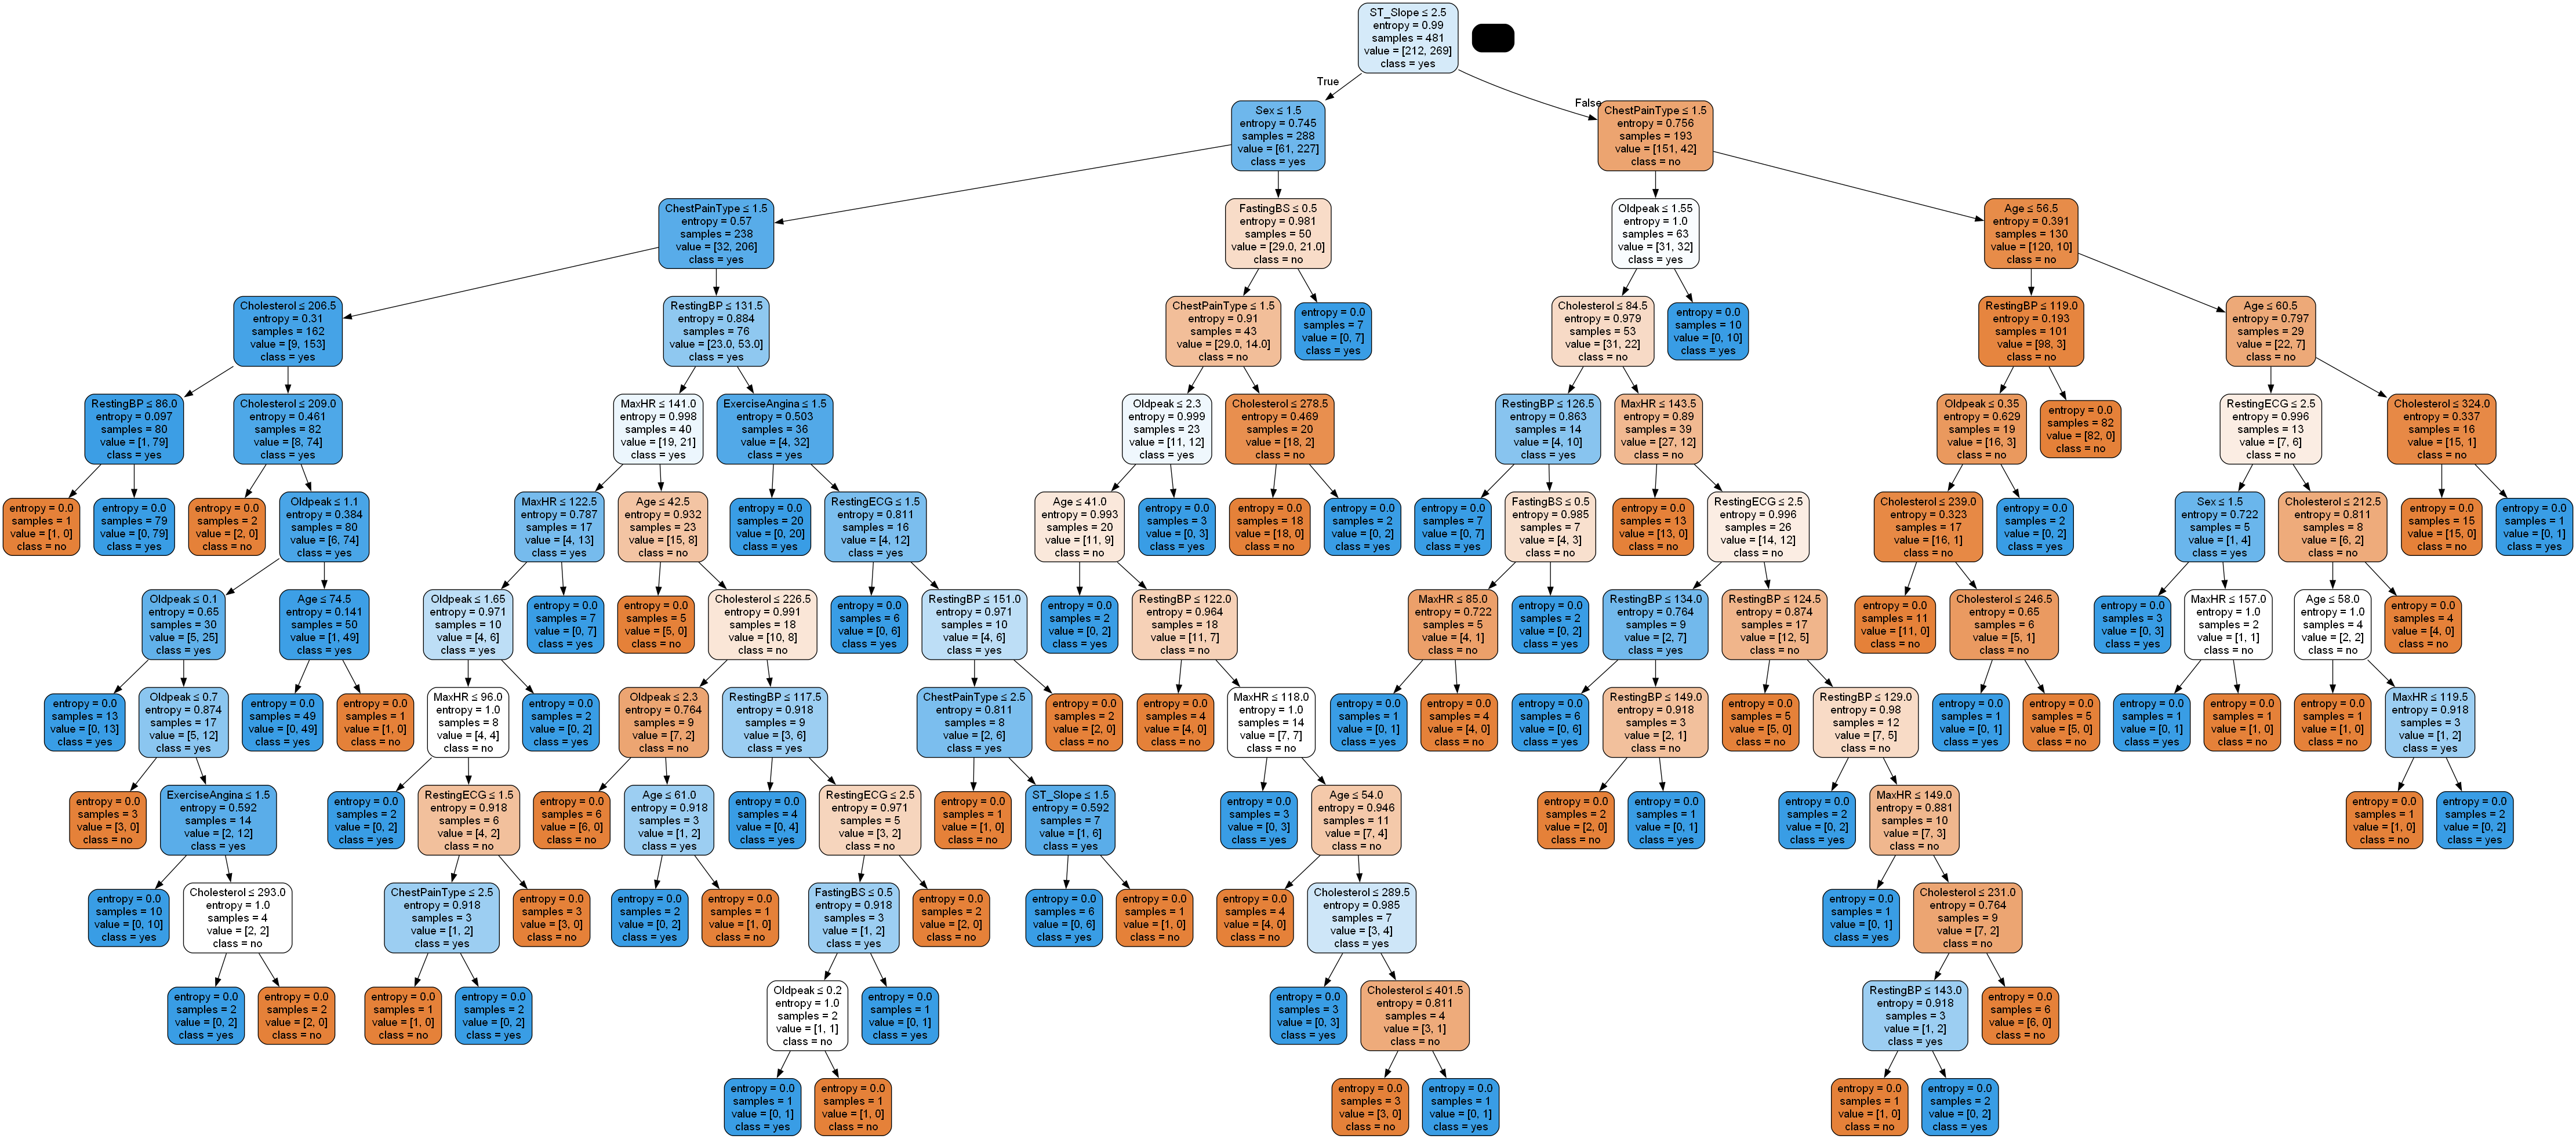

In [9]:
dot_data = StringIO()
export_graphviz(model, out_file = dot_data, filled = True, rounded = True, special_characters = True, feature_names = x_types, class_names=['no','yes'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
Image(graph.create_png(), width = 1500)

testing the model's efficiency by letting it predict on the unseen train dat

In [10]:
y_test = model.predict(x_test)
y_true = np.array(y_true).flatten()
print(accuracy_score(y_true,y_test)*100, "%")

81.36645962732919 %


confusion metrix to visualize the efficiency

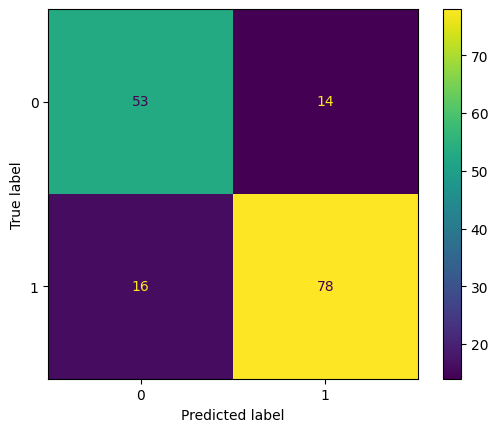

In [12]:
confusion_matrix(y_true, y_test)
ConfusionMatrixDisplay.from_predictions(y_true, y_test, labels=model.classes_)

making an actual prediction on the data for testing using our model

In [13]:
test_df = pd.read_csv("data//test_heart.csv")
test = test_df[x_types]
test = ce_ord.fit_transform(test)

prediction = model.predict(test)

out_df = pd.read_csv("data//sample_submission.csv")

for i,id in enumerate(out_df['id']):
    out_df['HeartDisease'][i] = prediction[i]

out_df.to_csv('output//output.csv', encoding='utf-8', index=False)